## Content

- Runtime complexity

- Multiclass classification 

- Using feature twice for split

- Feature importance

- Regression using Decision Tree

- Greedy Approximation of DT

- Summary

***

- Ensemble Models
    - Types of Ensembles

- Bagging



# **Train/Run time complexity**

#### Question: What do you think will be run time and space complexity will be ? 

Let 
- n be the number of data points 
- m be the number of nodes and 
- d be the depth of the tree 

Then, 
* **Train time complexity** is **$O(nlog(n)*d)$**
    - where nlog(n) is the time taken to sort numerical features
    - multiplied by d, as you have to calculate split for d features

* The **Run Time complexity** of the tree of depth d is O(depth) 
    - as we only have to evaluate at max d condtions

* The **Space complexity** of the tree is O(m)
    - we only have to store **m if else condtions**

Here,  depth is the function of number of nodes i.e log(m)   
 
If $d_{best}$ is computated using cross validation the decision tree will be very efficient at runtime.




<img src='https://drive.google.com/uc?id=1lgpPR9T2IxGxWsmUH9D8hO-5NTQtJFqE'>

## Multi class classification

#### How will DT work for multi class classification?

Whether it is binary or multiclass, DT works the same.

We just need to calculate the Entropy or Gini Impurity.

However, there is a catch
* at the leaf node if we have more classes we take the majority class.



<img src='https://drive.google.com/uc?id=1dDWifTRTzncApzTa-M6ExppyCJj5m6-Q'>


# **Interpretibility**

Decision Trees are hyper interpretable
- as we can read them as if else condition
- can be understood by non expert


<img src='https://drive.google.com/uc?id=1S8XxE09aiBO_RK_Bte8jKIGjr81An7Ef'>



## Using feature twice for split

#### Question: Can we use a feature twice for splitting?



Imagine we split the root node using feature $f_1$ 

**Can we use this feature again to split the child node ?**


<img src='https://drive.google.com/uc?id=1Ve7CZ5Pb8Tufhb98AhmEg5L9rVHgm1-z'>



Let's see for both categorical as well as numerical features

Let's say we have 
- 100 +ve points
- 100 -ve points at root node.

### Categorical feature

We used Gender (categorical) to split the data

We got two child nodes
- Male node:
    - 70 +ve
    - 30 -ve

- Female node:
    - 30 +ve
    - 70 -ve

**Can we again use Gender to split Male node?**

No. 
Even if we use, we only have Male category data in current node.
- there will be no information gain i.e. info gain = 0







<img src='https://drive.google.com/uc?id=1g_zrbs47bI4XqaQ4lJulVnal-B2mzfhn'>



But, there's an exception
- A single categorical feature can be used more than once in different branches of tree


<img src='https://drive.google.com/uc?id=16L9ZMNk4hz9eMrafNrPxcL4w-zLfNGrt'>



### Numerical feature

Now, let's say we are splitting the root node numerical feature i.e. Years of Experience.

First, we found out IG for each threshold and YOE of 12 yrs was giving the best IG.
- We split the node with $YOE ≤ 12$

#### Question: Can we again use numerical feature for split?

Yes. It is possible that same feature for different threshold may give best IG among all features at child node.




<img src='https://drive.google.com/uc?id=10CQM-YGajNRnSIMlPTvUvosTnCoXFEcb'>



# **Feature Importance**

Recall,
* In case of logistic and linear regression after standardisation we can just consider absolute value of weights which give us feature importance 

But we don't have any weights in DT.

#### Question: How can we get Feature importance for DT ? Any ideas?

Suppose we have 10,000 datapoints @ root node.

Let us consider a feature $f_i$ which is used twice in splitting a decision tree 

* At first split let the number of data points be 5000($n_1$) and Infromation Gain is IG$_1$
* Let number of data points at second split be 500($n_2$) and Infromation Gain is IG$_2$

* We calculate feature importaance of $f_i$ by 
 - $f_i$ = IG$_1$ * $\frac{n_1}{n}$ + IG$_2$ * $\frac{n_2}{n}$ 
 * i.e $f_i$ = IG$_1$ * $\frac{5000}{10,000}$ + IG$_2$ * $\frac{500}{10,000}$ 

This is called **normalized information gain.**

* Closer to the root node, more the weightage
    - it gives more weightage based on number of datapoints it is impacting.




<img src='https://drive.google.com/uc?id=12gJv36lGDumsuJ0bdafTB1Iq8bPpbs68'>


We calculate normalized information gain for all features and 
- this Normalized IG is used as feature importances.


Do note that this is one of the popular way of calulating Feature importance.

Different libraries may use different way of calculating Feature importance i.e. implementation specific.





<img src='https://drive.google.com/uc?id=1_89mxH7bzeSeuR90uQjSwU-jPlSGkeqV'>


### Code walkthrough

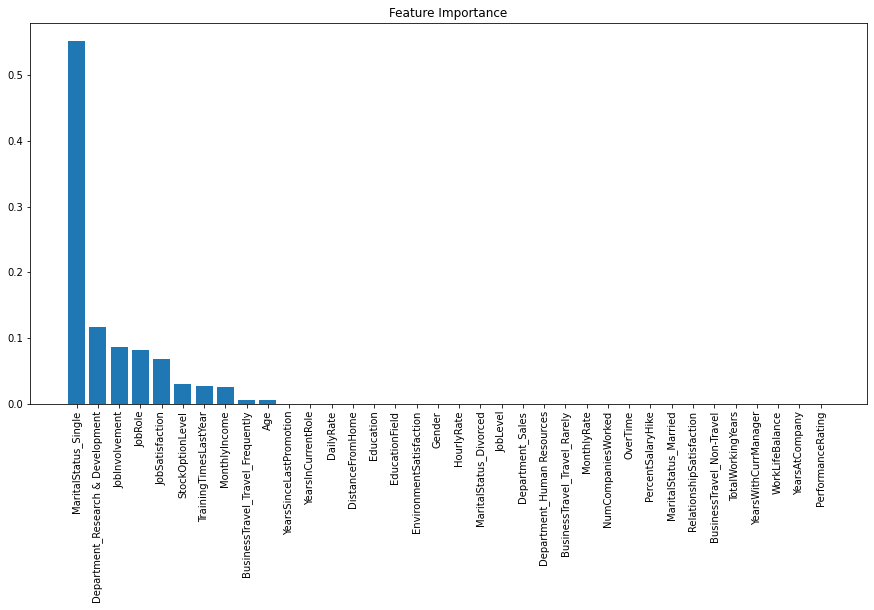

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_sm.columns))):
    feat = X_sm.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.551861
1,Department_Research & Development,0.116828
2,JobInvolvement,0.086921
3,JobRole,0.082005
4,JobSatisfaction,0.068126
5,StockOptionLevel,0.030027
6,TrainingTimesLastYear,0.027184
7,MonthlyIncome,0.025852
8,BusinessTravel_Travel_Frequently,0.005684
9,Age,0.005513


#### What can we infer from this data ?
- Marital Status affects attrition the most i.e. people with marital status single might be more likely attrite
- So the company can give some perks to these employees in order to reduce attrition rate
- Then comes factors such as R & D and Job Involvement.

# **Regression using decision tree**

For Classifiaction task,  
* We had entropy and Gini Impurity to choose the feature for split. 
* At leaf node, we had datapoints with $y_i's$ and
    - we used class label of **majority data points** to predict the class label for query data point.

#### Question: Can we use Entropy or Gini Impurity for regression?
NO! Since entropy and GI are functions of probability of class labels.
- For regression, we don't have any class labels
- We have continous values.


Also, we have continous y label in leaf nodes as well. How do we calculate predicted label? 

**What do we do in the Regression?**
*  We take the mean or median of all values in the leaf node and give that value as predicted value ($y_{pred}$).




<img src='https://drive.google.com/uc?id=18nvTgpEKS4Rhcn4em4hPNgyH1eRLF14Q'>

#### Question: What is the alternative for Entropy? (Hint: Recall Linear Regression)
* here, as we saw in linear regression already,we can use **Mean Squared Error or Median Absolute error**

Let us assume a data D at root node 
- along with $y_i$ (continuous) 
- It is split into D1 and D2 

Now we calculate 
- the MSE of these points in parent node and 
- the weighted MSE for the child nodes


Now, the difference between the MSE of parent node and weighted MSE of child nodes can be used as the criteria.
 * ΔMSE = (MSE of parent node) $-$ (weighted MSE of child nodes) 

* MSE is lowest when all $y_i$'s are same and high when they are diverse


<img src='https://drive.google.com/uc?id=11QnvrLTzCUN0pDEXHb5zXSOTIL_UHV-X'>




<img src='https://drive.google.com/uc?id=1jGzM-H3p-wgW3_bVga-WMNb_QsF0x5mj'>

#### How is MSE calculated? 
 
Let us assume we have a datapoints with target value $y$ 
* We consider the mean or medain of these points as predicted value i.e $ŷ_i$
* Now we calculate the MSE or MAE for these points, this will be the MSE of parent node.
* After the data is split 
 * We now consider the mean of all values ($y_i'$) in child node as predicted value $ŷ_i'$
 * we now calculate the MSE or MAE for these in each child node and then calculate the weighted  MSE of the child nodes.
* Then we find the difference and use this as the critearia to be compared among the features to decide the split.


<img src='https://drive.google.com/uc?id=1J8ifUk-ir3xCSsTRkr855bU0RB_ea-gF'>

### Example



Suppose we have 6 datapoints with two features ($f_1, f_2$)
- $f_1$ has categories $C_1, C_2, C_3, C_4$
- $f_2$ has categories $D_1, D_2, D_3$
- $y_i$'s are 1,2,3,4,5,6 resp.

#### Question: What will be the $ŷ$?
It'll be mean on the $y_i$'s i.e. 3.5

Suppose we are splitting by $f_1$
- There will be 4 child nodes as there are 4 categories

For category $C_1$
- We get 3 datapoints in child node
- $ŷ$ will be mean of 1,2,3 i.e. 2

For $C_2$
- We only got 1 datapoints
- MSE for this node will be zero as actual y and predicted y will be same

Similarly, we get datapoints in $C_3$ and $C_4$

- We calculate MSE for child nodes and then calculate weighted MSE for child nodes
- Then, we calculate ΔMSE i.e. MSE parent - weighted MSE of child.


#### What does ΔMSE signify?
It signifies the reduction in MSE from parent to child.

#### What is objective of regression?
We want to reduce the MSE as much as possible

So, We will pick the feature with highest ΔMSE  for split




<img src='https://drive.google.com/uc?id=1TTqz-kAYonTuDkR81BbBW_s4ZT8JxPwF'>

### Code walkthrough -sklearn DT regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
y_train = y_train.values

In [ ]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.26203654446752 Validation: -162.90925592378582
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.048119079766786 Validation: -13.39989251528687
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.9038139450277405 Validation: -13.834955053322545
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.7902751186766683 Validation: -13.84652404788459
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.783735335389713 Validation: -13.891536196689499
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.781426977910967 Validation: -13.896999974822002
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.781426977910967 Validation: -13.896999974822002
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.781426977910967 Validation: -13.896999974822002
***************


Notice, The regressor is overfitting
- This may be due to the fact that we have low number of datapoints for training.
- we can also try playing with hyperparam tuning



#### Visualizing Decision Tree

In [ ]:
features = list(regression_data.columns[0])

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

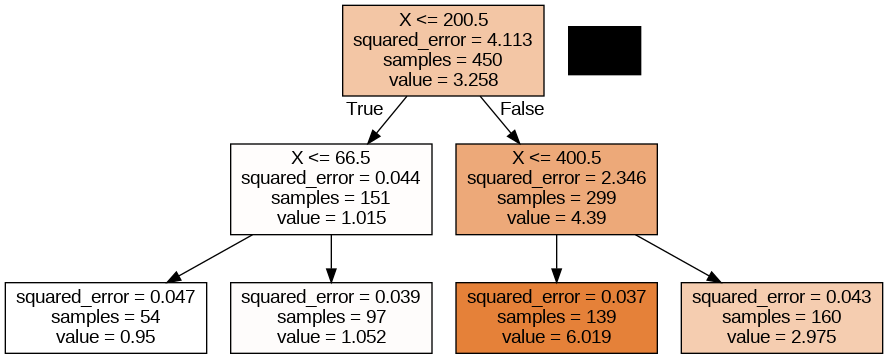

In [ ]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


#### Visualizing Regression Line

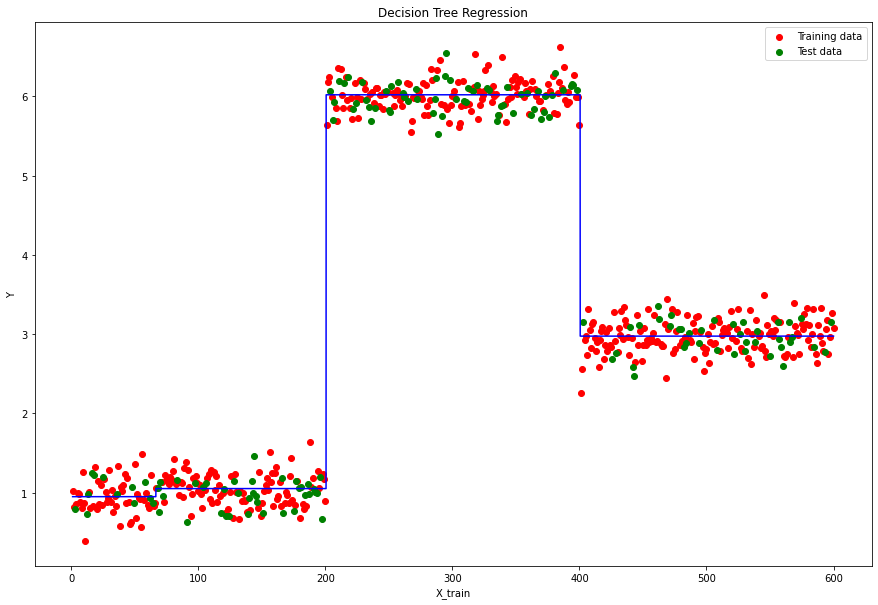

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train') 
plt.ylabel('Y')
plt.legend()
plt.show()

# Good to know: Greedy Approximation of DT

There is no guarantee that DT being created is going to be the most opitmal one

* **Building an optimal Decision Tree is a NP-Complete problem** 
    - This means it can't be done in polynomial time
   

* So, we do **Greedy approximation**, which picks the feature which gives the best Information Gain
    - The decision taken is the one that is best at that time
    - It might not be the best for entire decision tree



<img src='https://drive.google.com/uc?id=1RPdMDPcY6yPSngdtIYo9fMA9aFmadjg6'>


## Summary of Decision Tree

To summarise everything what we have learnt about decision tree:

1.   Decision Trees work well **when the d (depth) is not too large**
2. They have a very low **Run-time complexity** 
3. **No standardisation** is needed.
4. Depth is the key **hyper-parameter**





<img src='https://drive.google.com/uc?id=1qAHiBvWa19rqX-lI49DmmdZ4ATwoW9AB'>

# What Are Ensemble Models?

<center><img src='https://images.squarespace-cdn.com/content/v1/57dc396a03596e8da9fe6b73/1475277470988-9FJ47B36S61C5VXQ24HU/UBC_Bands.jpg' width = 600>

* Till now we have trained only one model for one task. But we have learnt many kinds of models. **Do you think we could somehow use multiple models for the same task?**

* What if we can **train multiple base learners or models** which are as different as possible and **combine them smartly**?

* Example: Instead of training one Decisioon tree we can train 100 decision trees and combine them 
* This is the key principle of ensembles 


* The word ensemble in english means multiple things, roughly it means **mixing** or **coming together**.

 * We can also train various machine learning models like Decision tree, logistic Regression, KNN and can combine them smartly. 



<img src='https://drive.google.com/uc?id=1PvJuXnvX6OY1_uAq8eOXFDjYvuxWh3vc'>


### Types of Ensembles

There are four main types of ensemble
1. Bagging
 * Example : Random Forest
2. Boosting 
 * Example : GBDT
3. Stacking
4. Cascading

Also, a mix of each of these can be possible



<img src='https://drive.google.com/uc?id=1njR8DUne8941A1S9jwxGcG8JkzWxlVGM'>

# **Bagging**

* Bagging is simply the **Bootstrapped Aggregation**.


> - Q1: Let's say we have 3 different models, *M1, M2, M3* and all are trained for the same regression task to predict house prices. Can you think of a simple way to use predictions from these 3 different models together ?
> - Ans: We can take the average prediction. (There are more complex ways, but we will not discuss those right now)
> - Q2: Can you think similarly for a classification model?
> - Ans: Voting. 


**Bagging refers to training different models for the same task, independently of each other and then cleverly combining their predictions.**


